<div style="text-align: center;font-size: 16px; line-height: 1.5;">
    <br>
    Interpolation<br><br>
    <span>Author: Daniel Coble</span>
</div>

It's common in engineering to have access to some data which samples a function, but not have access to the function directly. This situation could happen if the function comes from some experimental tests, or maybe the function comes from a computer, but it's prohibitively expensive to run it every time we want to sample from it. In any case, to get (an approximation of) the function, interpolation has to be used to get broader access to the function beyond the sampled points. The general set up of interpolation is as follows: some set of points $(x_i, y_i)$ are known where $y_i = f(x_i)$.  We have some point where we wish to sample, say $\tilde{x}$, and produce an approximation of $f(\tilde{x})$.

Normally, we have some control over how $x_i$ are chosen, and we would like to those $x_i$ so that the approximation is as accurate as possible, anywhere in the domain. The two factors that improve accuracy are that for any point $\tilde{x}$ in the domain,

1. there are points in $x_i$ near $\tilde{x}$, and
2. these points surround (are on all sides of) $\tilde{x}$.

If those conditions are not met, we can say we are dealing with an _extrapolation_ problem. Though it's sometimes necessary, extrapolation is always less accurate than interpolation. Let's consider the one dimensional case, where $x_i\in\mathbb{R}$. In the plot below, the blue points show where the function value is known, the red vertical line indicates the $\tilde{x}$ value we wish to estimate $f$.

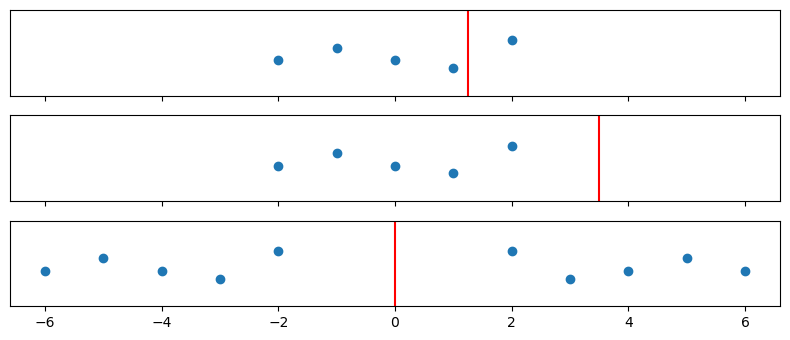

In [1]:
from plots import plot_1; plot_1()

The first plot correctly shows interpolation. The vertical line is between the $x_i$ points. We could imagine a curve connecting each of these points, and where it intersects the vertical line, we produce our estimate of $f(\tilde{x})$. The question of interpolation is how to chose this curve. The points in this plot are equally spaced; that's a very common choice, and is fine as long as the _mesh_ is fine enough (the distance between adjacent points) is small enough to capture the function. 

The second plots is a clear example of extrapolation. $\tilde{x}$ is outside the bounds of the data. We could imagine creating a line and extending out to $\tilde{x}, but with data only on one side, it's likely that this estimation is inaccurate. 

But what about the third plot? Even though it is between points in the dataset, the points are pretty far away. With such a wide, the function could move in any sort of way and reach $\tilde{x}$ over any range of values. In this situation, the data is clustered, and $\tilde{x}$ exists as a point outside the domain where $f$ can be accurately approximated.

Notice that if we are dealing with interpolation, the domain of interest must be _bounded_; it cannot extend to infinity in either direction because the dataset is finite. That's an important fact to keep in the back of your mind, because interpolation is also a very important concept in machine learning! ML only works on bounded datasets, and suck at extrapolating in general.

But what about when $x_i$ is a vector? Let's be a bit more formal with this. Say we have sampled points $\{(x_i, y_i)\}_{i=1}^N$. $x_i\in \mathbb{R}^n$ and $y_i\in\mathbb{R}$, with $y_i=f(x_i)$ for some function $f$. The domain of $f$ is $\Omega\subset\mathbb{R}^n$, is all points where $f$ is defined (or that we care about), so obviously $\{x_i\}_{i=1}^N\subset \Omega$. The question of interpolation versus extrapolation is whether $\{x_i\}_{i=1}^N$ also is somehow 'representative' of all of $\Omega$. For this, let's take $\Omega$ to be the convex hull of $\{x_i\}_{i=1}^N$. The idea here is that any point in the domain must be reachable by starting at some point $x_i$, and from there moving towards other points in $x_i$. We write that for $\tilde{x}\in\Omega$, there exists $\{a_i\}_{i=1}^N$ with 
$$ \tilde{x} = \sum_{i=1}^N a_ix_i$$
$$  a_i \geq 0 \text{ for all } i $$
$$ \sum_{i=1}^N a_i = 1$$
It may be a good think to understand why the math above describes the convex shell. Many forms of interpolation only apply to the convex hull of the sample points. Below is a plot of the convex hull of a 2D pointcloud.

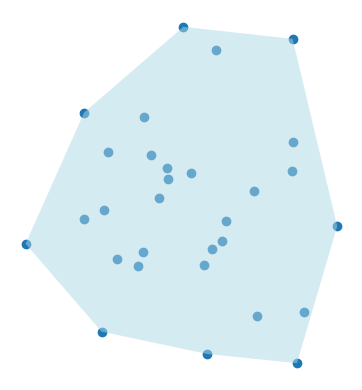

In [1]:
from plots import plot_2; plot_2()

Let's implement what is basically the easiest type of interpolation - linear interpolation in 1 dimension. This is the type of interpolation that comes from connecting adjacent points by a straight line. If $\tilde{x}$ is inside convex hull of the dataset, (that's the same as saying $x_1 \leq \tilde{x} \leq x_N$), then there must be an $i$ with $x_i\leq\tilde{x}\leq x_{i+1}$. There is an $\alpha$ between 0 and 1 so that
$$ \tilde{x} = (1-\alpha) x_i + \alpha x_{i+1}. $$
By solving for $\alpha$ in the above equation, we get
$$ \alpha = \frac{\tilde{x}-x_i}{x_{i+1}-x_i}. $$
The solution to $\tilde{y}$ mirrors the equations in $x$:
$$ \tilde{y}=(1-\alpha) y_i + \alpha y_{i+1}.$$
Let's approximate the function $\sin$ between $0$ and $2\pi$ with linear interpolation.

<IPython.core.display.Javascript object>


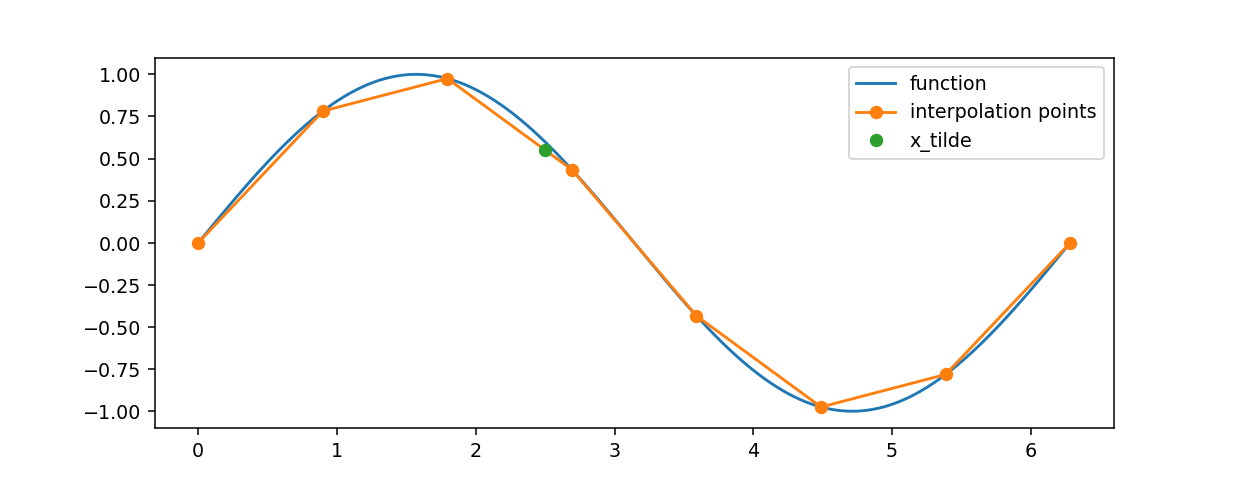

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

N = 8

x_points = np.linspace(0, 2*np.pi, num=N)
y_points = np.sin(x_points)

def interp(x_points, y_points, x_tilde):
    if(not x_points[0] <= x_tilde <= x_points[-1]):
        print('x_tilde must be in the convex hull!')
        return
    i = 0
    while(x_points[i+1] < x_tilde):
        i += 1
    alpha = (x_tilde - x_points[i])/(x_points[i+1]-x_points[i])
    return (1-alpha)*y_points[i] + alpha*y_points[i+1]

# mess around with changing x_tilde, N, or change sin to something else

x_tilde = 2.5
y_tilde = interp(x_points, y_points, x_tilde)

x_upsample = np.linspace(0, 2*np.pi, num=1000)
plt.figure(figsize=(9, 3.5))
plt.plot(x_upsample, np.sin(x_upsample), label='function')
# linear interpolation is the way matplotlib handles plotting functions from a list of points, making it easy to plot!
plt.plot(x_points, y_points, marker='o', label='interpolation points')
plt.plot([x_tilde], [y_tilde], marker='o', linewidth=0, label='x_tilde')
plt.legend()

As you can see, there are some places, at the peak and trough of $\sin$ where the linear interpolation fits worse than others. To improve the approximation while keeping with linear interpolation, we could:
1. Increase N.
2. Change the distribution of ${x_i}_{i=1}^N%$ to concentrate points around where the approximation is poor.

But look at the quality of $\sin$ where the approximation is poor. In these places, the second derivative of $\sin$ is large (in magnitude) Here, $\sin$ looks more like a quadratic than a line. That suggests we should:

3. Change the type of interpolation to something higher-order.

Polynomial interpolation uses a polynomial in each interval $[x_i,x_{i+1}]$. If the interpolant were only required to be continuous, the problem would be underdefined, so continuity is also enforced on the derivatives up to one less than the order of the polynomial. So, quadratic interpolation has a contiuous first derivative, and a cubic interpolation has continuous first and second derivatives. Rather than implementing this by hand, let's use the scipy.interpolate package. 

<IPython.core.display.Javascript object>


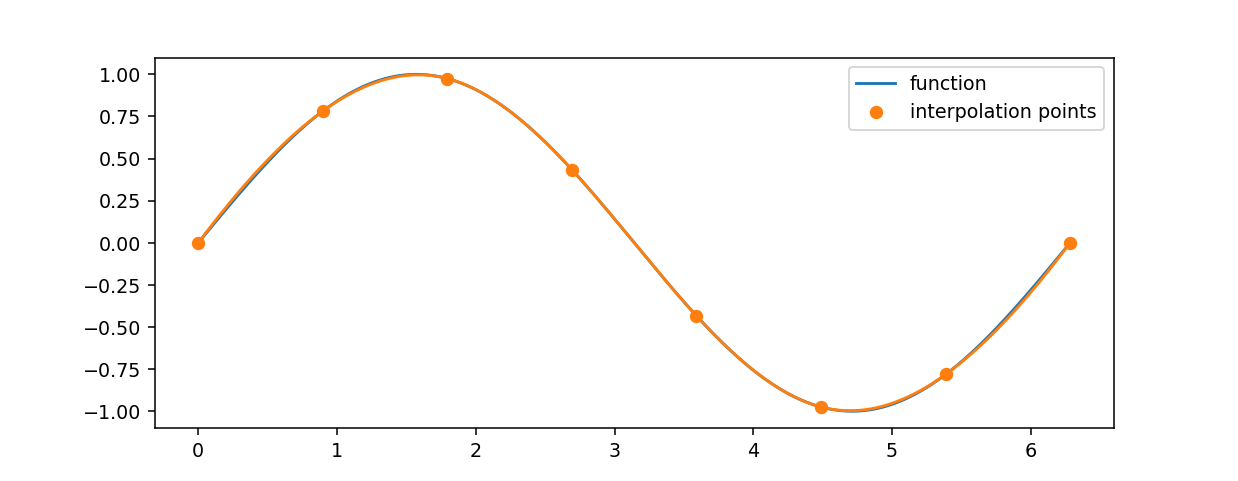

In [28]:
from scipy.interpolate import make_interp_spline

N = 8
x_points = np.linspace(0, 2*np.pi, num=N)
y_points = np.sin(x_points)

b_spline = make_interp_spline(x_points, y_points, k=3) # k: order of interpolation

y_interp = b_spline(x_upsample)

plt.figure(figsize=(9, 3.5))
plt.plot(x_upsample, np.sin(x_upsample), label='function')
plt.plot(x_points, y_points, marker='o', linewidth=0, label='interpolation points')
plt.plot(x_upsample, y_interp, c='tab:orange')
plt.legend()

# Try changing the order of interpolation, N, or the function sin

<IPython.core.display.Javascript object>


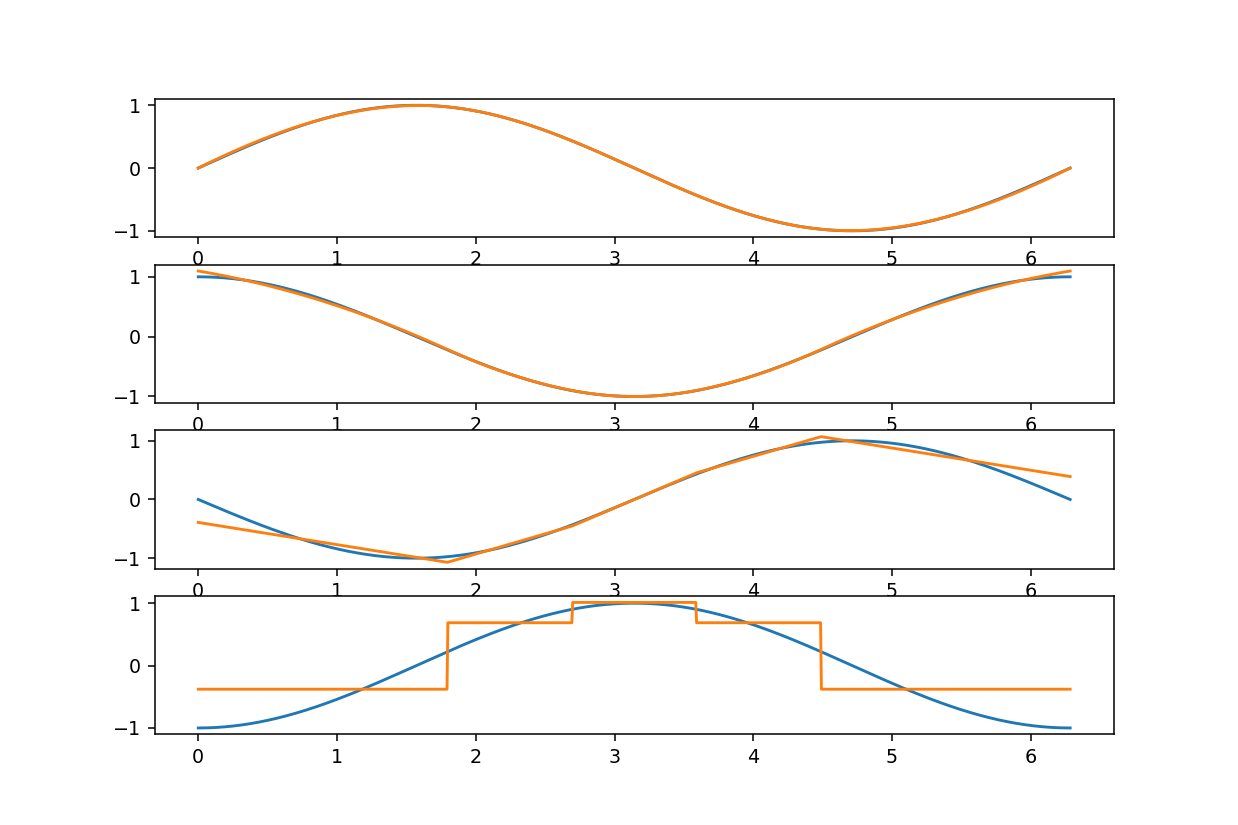

In [37]:
# Scipy also lets us easily plot the function's derivatives. 

y = b_spline
dy = y.derivative()
ddy = dy.derivative()
dddy = ddy.derivative()

fig, axes = plt.subplots(4, 1, figsize=(9, 6))
for i in range(4):
    axes[i].plot(x_upsample, [np.sin, np.cos, lambda x: -np.sin(x), lambda x: -np.cos(x)][i](x_upsample), label='exact')
    axes[i].plot(x_upsample, [y, dy, ddy, dddy][i](x_upsample), label='approximate')

**Challenge problem**

(1) The sigmoid function is defined by
$$\sigma(x)=\frac{1}{1+e^{-x}}$$
Implement this function, then create an linear interpolation approximation (over some bound). Then, create a linear interpolation approximation of $e^x$, and use this to create another approximation of $\sigma(x)$. Plot the two approximations. Are they equivalent? Why or why not?

(2) 2D linear interpolation (or bilinear interpolation) extends the 1D linear interpolation equation to when $x=(x^{(1)},x^{(2)})$ is two-dimensional. Say we have interpolation points $x_i=(x_i^{(1)},x_i^{(2)})$ and want to interpolate at $\tilde{x}=(\tilde{x}^{(1)},\tilde{x}^{(2)})$. Just like in 1D linear interpolation, the first step is finding an $i$ and $j$ such that $x_i^{(1)}\leq \tilde{x}^{(1)} \leq x_{i+1}^{(1)}$ and $x_j^{(2)}\leq \tilde{x}^{(2)} \leq x_{j+1}^{(2)}$. Next, determine $\alpha^{(1)}$ and $\alpha^{(2)}$ from the equation shown at the beginning of the notebook. The bilinear interpolation equation is
$$ \tilde{y} = (1-\alpha^{(1)})(1-\alpha^{(2)})$$
$$ = $$
$$ = $$
Let 
$$ f(x) = \sin(x^{(1)})\cos(x^{(2)}) $$
Chose some sampling of $f$ in the domain $[0,\pi]\times[0,\pi]$, and implement 

TypeError: bad operand type for unary -: 'numpy.ufunc'